In [1]:
%store -r stats_circle stats_upwind stats_downwind

In [2]:
# Correcting the errors in the provided code

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import matplotlib as mpl

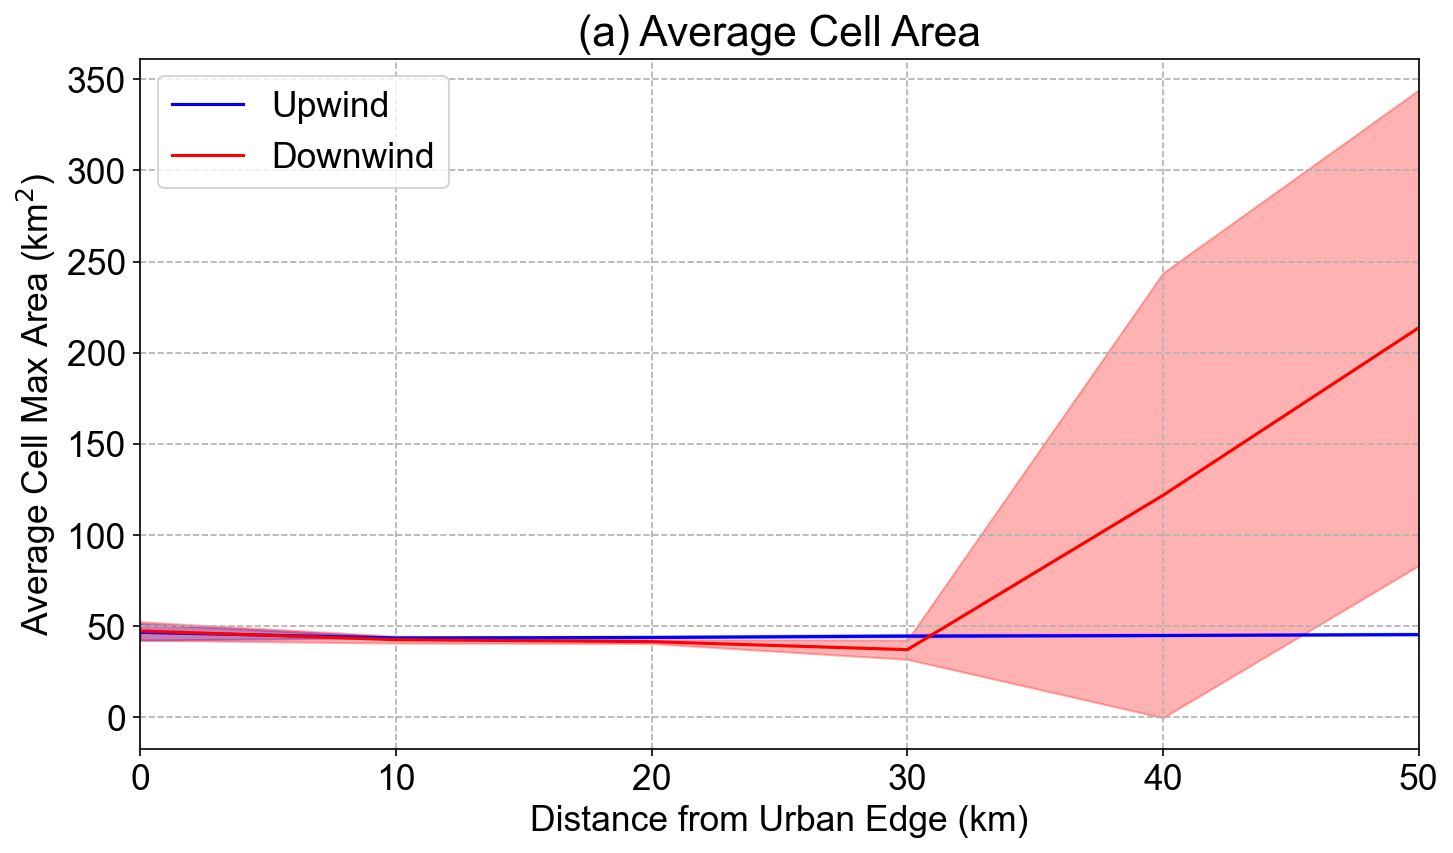

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic

mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Function to calculate distance from the edge of the urban circle
def distance_from_urban_edge(lat, lon, center, radius_deg):
    distance_to_center = geodesic(center, (lat, lon)).kilometers
    radius_km = geodesic(center, (center[0], center[1] + radius_deg)).kilometers
    return max(0, distance_to_center - radius_km)

# Function to process data and get average cell area for each distance bin
def process_data_area(data, urban_center, urban_radius_deg, bin_width):
    cell_mean_latitudes = data['cell_meanlat'].values
    cell_mean_longitudes = data['cell_meanlon'].values
    max_dbzs = data['cell_area'].max(dim='times').values  # Max area per cell as a scalar

    distances_from_edge = []
    areas = []
    for lat_arr, lon_arr, area in zip(cell_mean_latitudes, cell_mean_longitudes, max_dbzs):
        if not np.all(np.isnan(lat_arr)) and not np.all(np.isnan(lon_arr)) and not np.isnan(area):
            valid_indices = ~np.isnan(lat_arr) & ~np.isnan(lon_arr)
            mean_lat = np.mean(lat_arr[valid_indices])
            mean_lon = np.mean(lon_arr[valid_indices])
            distance = distance_from_urban_edge(mean_lat, mean_lon, urban_center, urban_radius_deg)
            distances_from_edge.append(distance)
            areas.append(area)

    max_distance_from_edge = max(distances_from_edge)
    bins_from_edge = np.arange(0, max_distance_from_edge + bin_width, bin_width)

    avg_area_per_bin = []
    for i in range(len(bins_from_edge)-1):
        bin_indices = (distances_from_edge >= bins_from_edge[i]) & (distances_from_edge < bins_from_edge[i+1])
        if np.any(bin_indices):
            avg_area = np.mean([area for j, area in enumerate(areas) if bin_indices[j]])
        else:
            avg_area = 0
        avg_area_per_bin.append(avg_area)

    return bins_from_edge, avg_area_per_bin

# Function to calculate running mean and standard deviation
def calculate_running_stats(data, window_size):
    running_mean = np.convolve(data, np.ones(window_size) / window_size, mode='valid')

    # Calculate running standard deviation
    running_std = []
    for i in range(len(data) - window_size + 1):
        running_std.append(np.std(data[i:i+window_size]))

    return running_mean, np.array(running_std)

# Provided urban area coordinates and radius in degrees
urban_longitude = -95.43207102398061
urban_latitude = 29.759806849922565
urban_radius_deg = 0.49588967877239437
urban_center = (urban_latitude, urban_longitude)

# Load the NetCDF data for different scenarios
data1 = stats_upwind  # Replace with actual file path or variable
data2 = stats_downwind  # Replace with actual file path or variable

# Process each dataset
bin_width = 10  # km
running_mean_window = 3  # Window size for running mean

bins_edge1, avg_area1 = process_data_area(data1, urban_center, urban_radius_deg, bin_width)
running_mean1, running_std1 = calculate_running_stats(avg_area1, running_mean_window)

bins_edge2, avg_area2 = process_data_area(data2, urban_center, urban_radius_deg, bin_width)
running_mean2, running_std2 = calculate_running_stats(avg_area2, running_mean_window)

# Plotting in a single subplot using line plots for running mean
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

# Upwind plot with standard deviation
ax.plot(bins_edge1[:len(running_mean1)], running_mean1, color='blue', label='Upwind')
ax.fill_between(bins_edge1[:len(running_mean1)], running_mean1 - running_std1, running_mean1 + running_std1, color='blue', alpha=0.3)

# Downwind plot with standard deviation
ax.plot(bins_edge2[:len(running_mean2)], running_mean2, color='red', label='Downwind')
ax.fill_between(bins_edge2[:len(running_mean2)], running_mean2 - running_std2, running_mean2 + running_std2, color='red', alpha=0.3)

ax.set_xlabel('Distance from Urban Edge (km)')
ax.set_ylabel('Average Cell Max Area (km$^2$)')
ax.set_title('(a) Average Cell Area')
ax.legend(loc='upper left')

ax.set_xlim([0, 50])  # Setting x-axis limit to 60 km
plt.grid(ls='--')
plt.tight_layout()
plt.show()


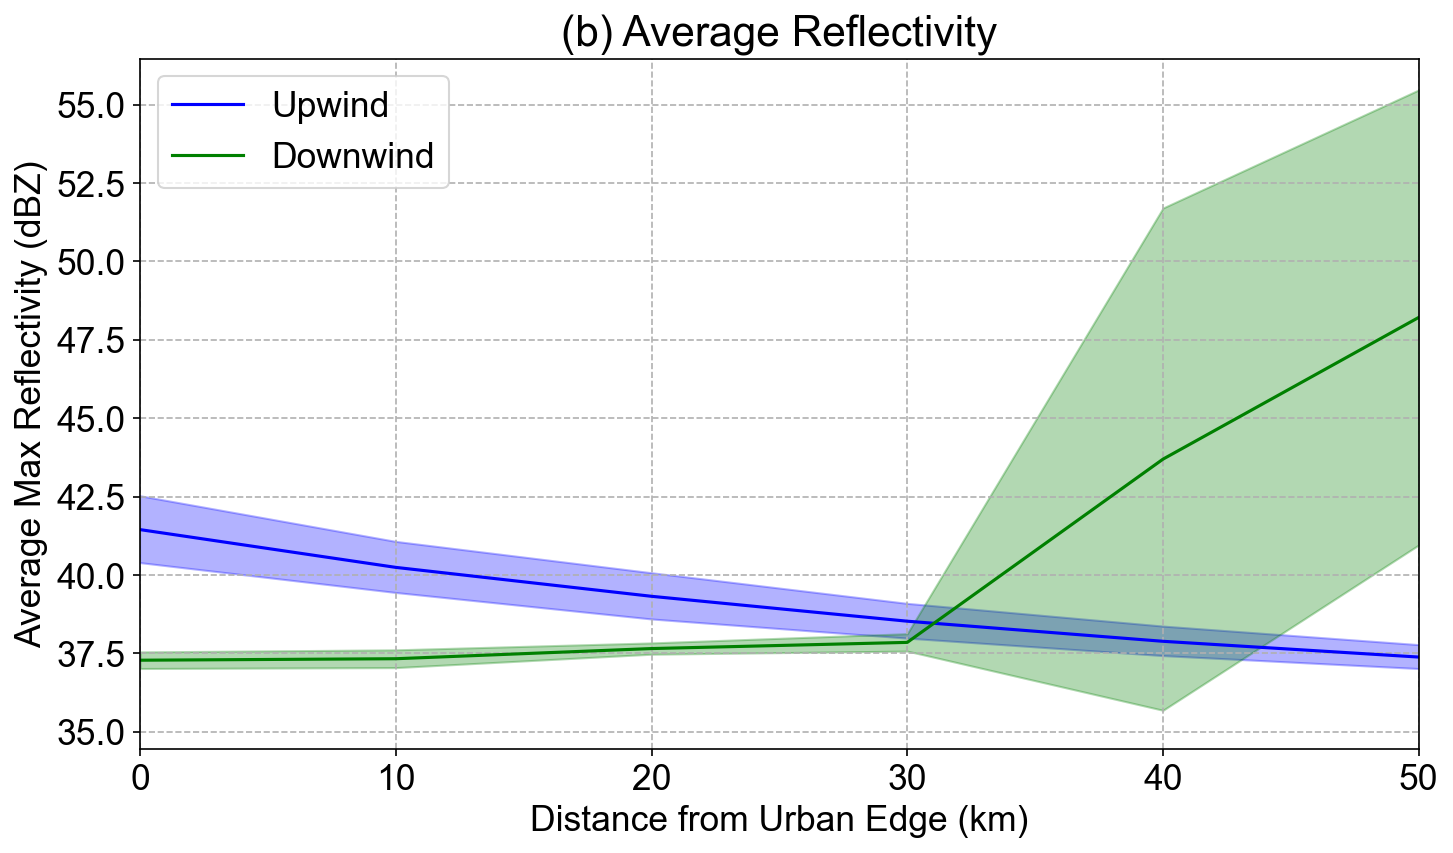

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic

mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Function to calculate distance from the edge of the urban circle
def distance_from_urban_edge(lat, lon, center, radius_deg):
    distance_to_center = geodesic(center, (lat, lon)).kilometers
    radius_km = geodesic(center, (center[0], center[1] + radius_deg)).kilometers
    return max(0, distance_to_center - radius_km)

# Function to process data and get average cell area for each distance bin
def process_data_area(data, urban_center, urban_radius_deg, bin_width):
    cell_mean_latitudes = data['cell_meanlat'].values
    cell_mean_longitudes = data['cell_meanlon'].values
    max_dbzs = data['max_dbz'].max(dim='times').values  # Max area per cell as a scalar

    distances_from_edge = []
    areas = []
    for lat_arr, lon_arr, area in zip(cell_mean_latitudes, cell_mean_longitudes, max_dbzs):
        if not np.all(np.isnan(lat_arr)) and not np.all(np.isnan(lon_arr)) and not np.isnan(area):
            valid_indices = ~np.isnan(lat_arr) & ~np.isnan(lon_arr)
            mean_lat = np.mean(lat_arr[valid_indices])
            mean_lon = np.mean(lon_arr[valid_indices])
            distance = distance_from_urban_edge(mean_lat, mean_lon, urban_center, urban_radius_deg)
            distances_from_edge.append(distance)
            areas.append(area)

    max_distance_from_edge = max(distances_from_edge)
    bins_from_edge = np.arange(0, max_distance_from_edge + bin_width, bin_width)

    avg_area_per_bin = []
    for i in range(len(bins_from_edge)-1):
        bin_indices = (distances_from_edge >= bins_from_edge[i]) & (distances_from_edge < bins_from_edge[i+1])
        if np.any(bin_indices):
            avg_area = np.mean([area for j, area in enumerate(areas) if bin_indices[j]])
        else:
            avg_area = 0
        avg_area_per_bin.append(avg_area)

    return bins_from_edge, avg_area_per_bin

# Function to calculate running mean and standard deviation
def calculate_running_stats(data, window_size):
    running_mean = np.convolve(data, np.ones(window_size) / window_size, mode='valid')

    # Calculate running standard deviation
    running_std = []
    for i in range(len(data) - window_size + 1):
        running_std.append(np.std(data[i:i+window_size]))

    return running_mean, np.array(running_std)

# Provided urban area coordinates and radius in degrees
urban_longitude = -95.43207102398061
urban_latitude = 29.759806849922565
urban_radius_deg = 0.49588967877239437
urban_center = (urban_latitude, urban_longitude)

# Load the NetCDF data for different scenarios
data1 = stats_upwind  # Replace with actual file path or variable
data2 = stats_downwind  # Replace with actual file path or variable

# Process each dataset
bin_width = 10  # km
running_mean_window = 3  # Window size for running mean

bins_edge1, avg_area1 = process_data_area(data1, urban_center, urban_radius_deg, bin_width)
running_mean1, running_std1 = calculate_running_stats(avg_area1, running_mean_window)

bins_edge2, avg_area2 = process_data_area(data2, urban_center, urban_radius_deg, bin_width)
running_mean2, running_std2 = calculate_running_stats(avg_area2, running_mean_window)

# Plotting in a single subplot using line plots for running mean
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

# Upwind plot with standard deviation
ax.plot(bins_edge1[:len(running_mean1)], running_mean1, color='blue', label='Upwind')
ax.fill_between(bins_edge1[:len(running_mean1)], running_mean1 - running_std1, running_mean1 + running_std1, color='blue', alpha=0.3)

# Downwind plot with standard deviation
ax.plot(bins_edge2[:len(running_mean2)], running_mean2, color='green', label='Downwind')
ax.fill_between(bins_edge2[:len(running_mean2)], running_mean2 - running_std2, running_mean2 + running_std2, color='green', alpha=0.3)

ax.set_xlabel('Distance from Urban Edge (km)')
ax.set_ylabel('Average Max Reflectivity (dBZ)')
ax.set_title('(b) Average Reflectivity')
ax.legend(loc='upper left')

ax.set_xlim([0, 50])  # Setting x-axis limit to 60 km
plt.grid(ls='--')
plt.tight_layout()
plt.show()


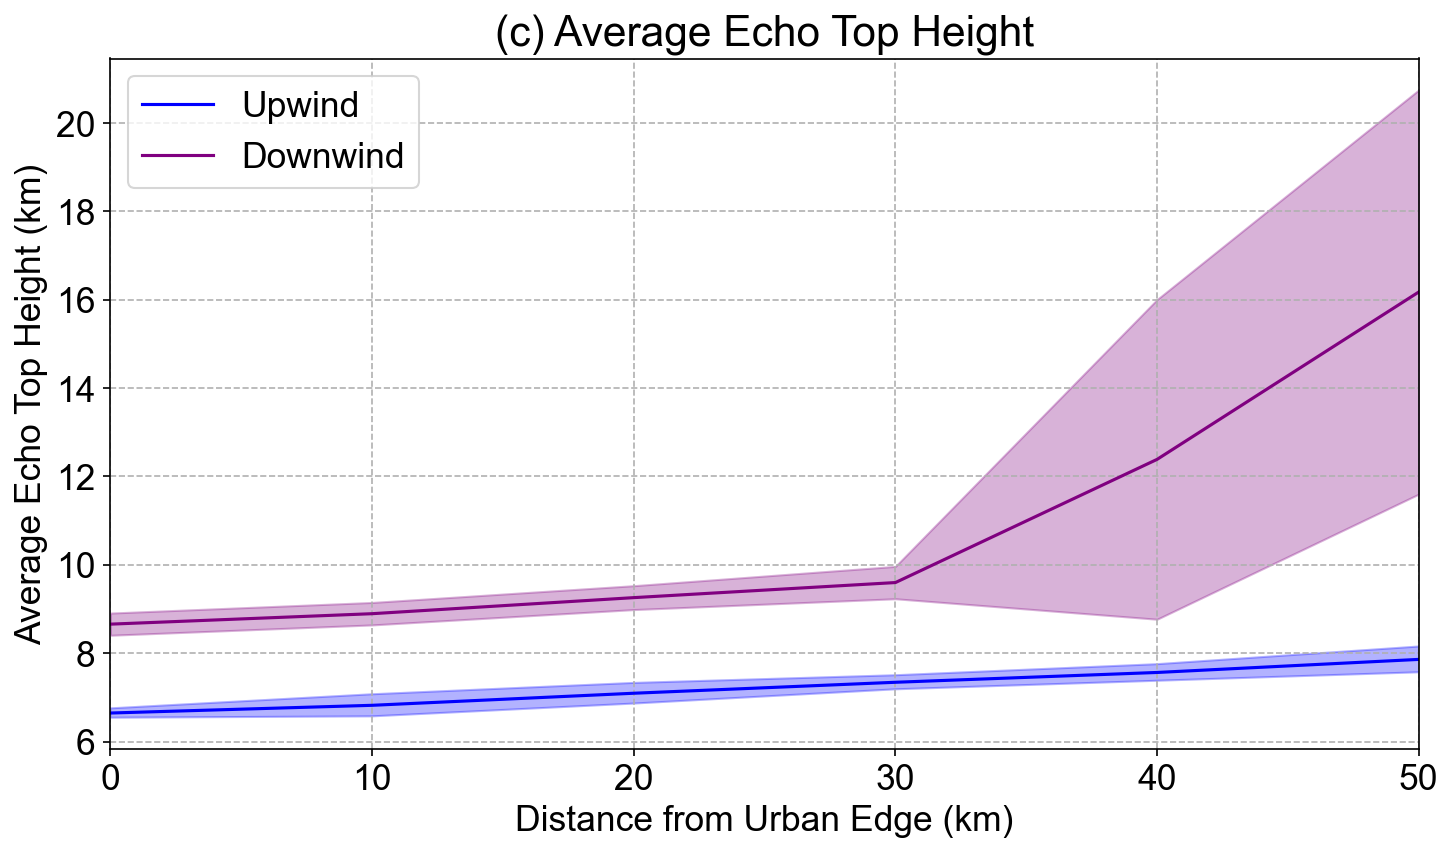

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic

mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Function to calculate distance from the edge of the urban circle
def distance_from_urban_edge(lat, lon, center, radius_deg):
    distance_to_center = geodesic(center, (lat, lon)).kilometers
    radius_km = geodesic(center, (center[0], center[1] + radius_deg)).kilometers
    return max(0, distance_to_center - radius_km)

# Function to process data and get average cell area for each distance bin
def process_data_area(data, urban_center, urban_radius_deg, bin_width):
    cell_mean_latitudes = data['cell_meanlat'].values
    cell_mean_longitudes = data['cell_meanlon'].values
    max_dbzs = data['maxETH_20dbz'].max(dim='times').values  # Max area per cell as a scalar

    distances_from_edge = []
    areas = []
    for lat_arr, lon_arr, area in zip(cell_mean_latitudes, cell_mean_longitudes, max_dbzs):
        if not np.all(np.isnan(lat_arr)) and not np.all(np.isnan(lon_arr)) and not np.isnan(area):
            valid_indices = ~np.isnan(lat_arr) & ~np.isnan(lon_arr)
            mean_lat = np.mean(lat_arr[valid_indices])
            mean_lon = np.mean(lon_arr[valid_indices])
            distance = distance_from_urban_edge(mean_lat, mean_lon, urban_center, urban_radius_deg)
            distances_from_edge.append(distance)
            areas.append(area)

    max_distance_from_edge = max(distances_from_edge)
    bins_from_edge = np.arange(0, max_distance_from_edge + bin_width, bin_width)

    avg_area_per_bin = []
    for i in range(len(bins_from_edge)-1):
        bin_indices = (distances_from_edge >= bins_from_edge[i]) & (distances_from_edge < bins_from_edge[i+1])
        if np.any(bin_indices):
            avg_area = np.mean([area for j, area in enumerate(areas) if bin_indices[j]])
        else:
            avg_area = 0
        avg_area_per_bin.append(avg_area)

    return bins_from_edge, avg_area_per_bin

# Function to calculate running mean and standard deviation
def calculate_running_stats(data, window_size):
    running_mean = np.convolve(data, np.ones(window_size) / window_size, mode='valid')

    # Calculate running standard deviation
    running_std = []
    for i in range(len(data) - window_size + 1):
        running_std.append(np.std(data[i:i+window_size]))

    return running_mean, np.array(running_std)

# Provided urban area coordinates and radius in degrees
urban_longitude = -95.43207102398061
urban_latitude = 29.759806849922565
urban_radius_deg = 0.49588967877239437
urban_center = (urban_latitude, urban_longitude)

# Load the NetCDF data for different scenarios
data1 = stats_upwind  # Replace with actual file path or variable
data2 = stats_downwind  # Replace with actual file path or variable

# Process each dataset
bin_width = 10  # km
running_mean_window = 3  # Window size for running mean

bins_edge1, avg_area1 = process_data_area(data1, urban_center, urban_radius_deg, bin_width)
running_mean1, running_std1 = calculate_running_stats(avg_area1, running_mean_window)

bins_edge2, avg_area2 = process_data_area(data2, urban_center, urban_radius_deg, bin_width)
running_mean2, running_std2 = calculate_running_stats(avg_area2, running_mean_window)

# Plotting in a single subplot using line plots for running mean
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

# Upwind plot with standard deviation
ax.plot(bins_edge1[:len(running_mean1)], running_mean1, color='blue', label='Upwind')
ax.fill_between(bins_edge1[:len(running_mean1)], running_mean1 - running_std1, running_mean1 + running_std1, color='blue', alpha=0.3)

# Downwind plot with standard deviation
ax.plot(bins_edge2[:len(running_mean2)], running_mean2, color='purple', label='Downwind')
ax.fill_between(bins_edge2[:len(running_mean2)], running_mean2 - running_std2, running_mean2 + running_std2, color='purple', alpha=0.3)

ax.set_xlabel('Distance from Urban Edge (km)')
ax.set_ylabel('Average Echo Top Height (km)')
ax.set_title('(c) Average Echo Top Height')
ax.legend(loc='upper left')

ax.set_xlim([0, 50])  # Setting x-axis limit to 60 km
plt.grid(ls='--')
plt.tight_layout()
plt.show()


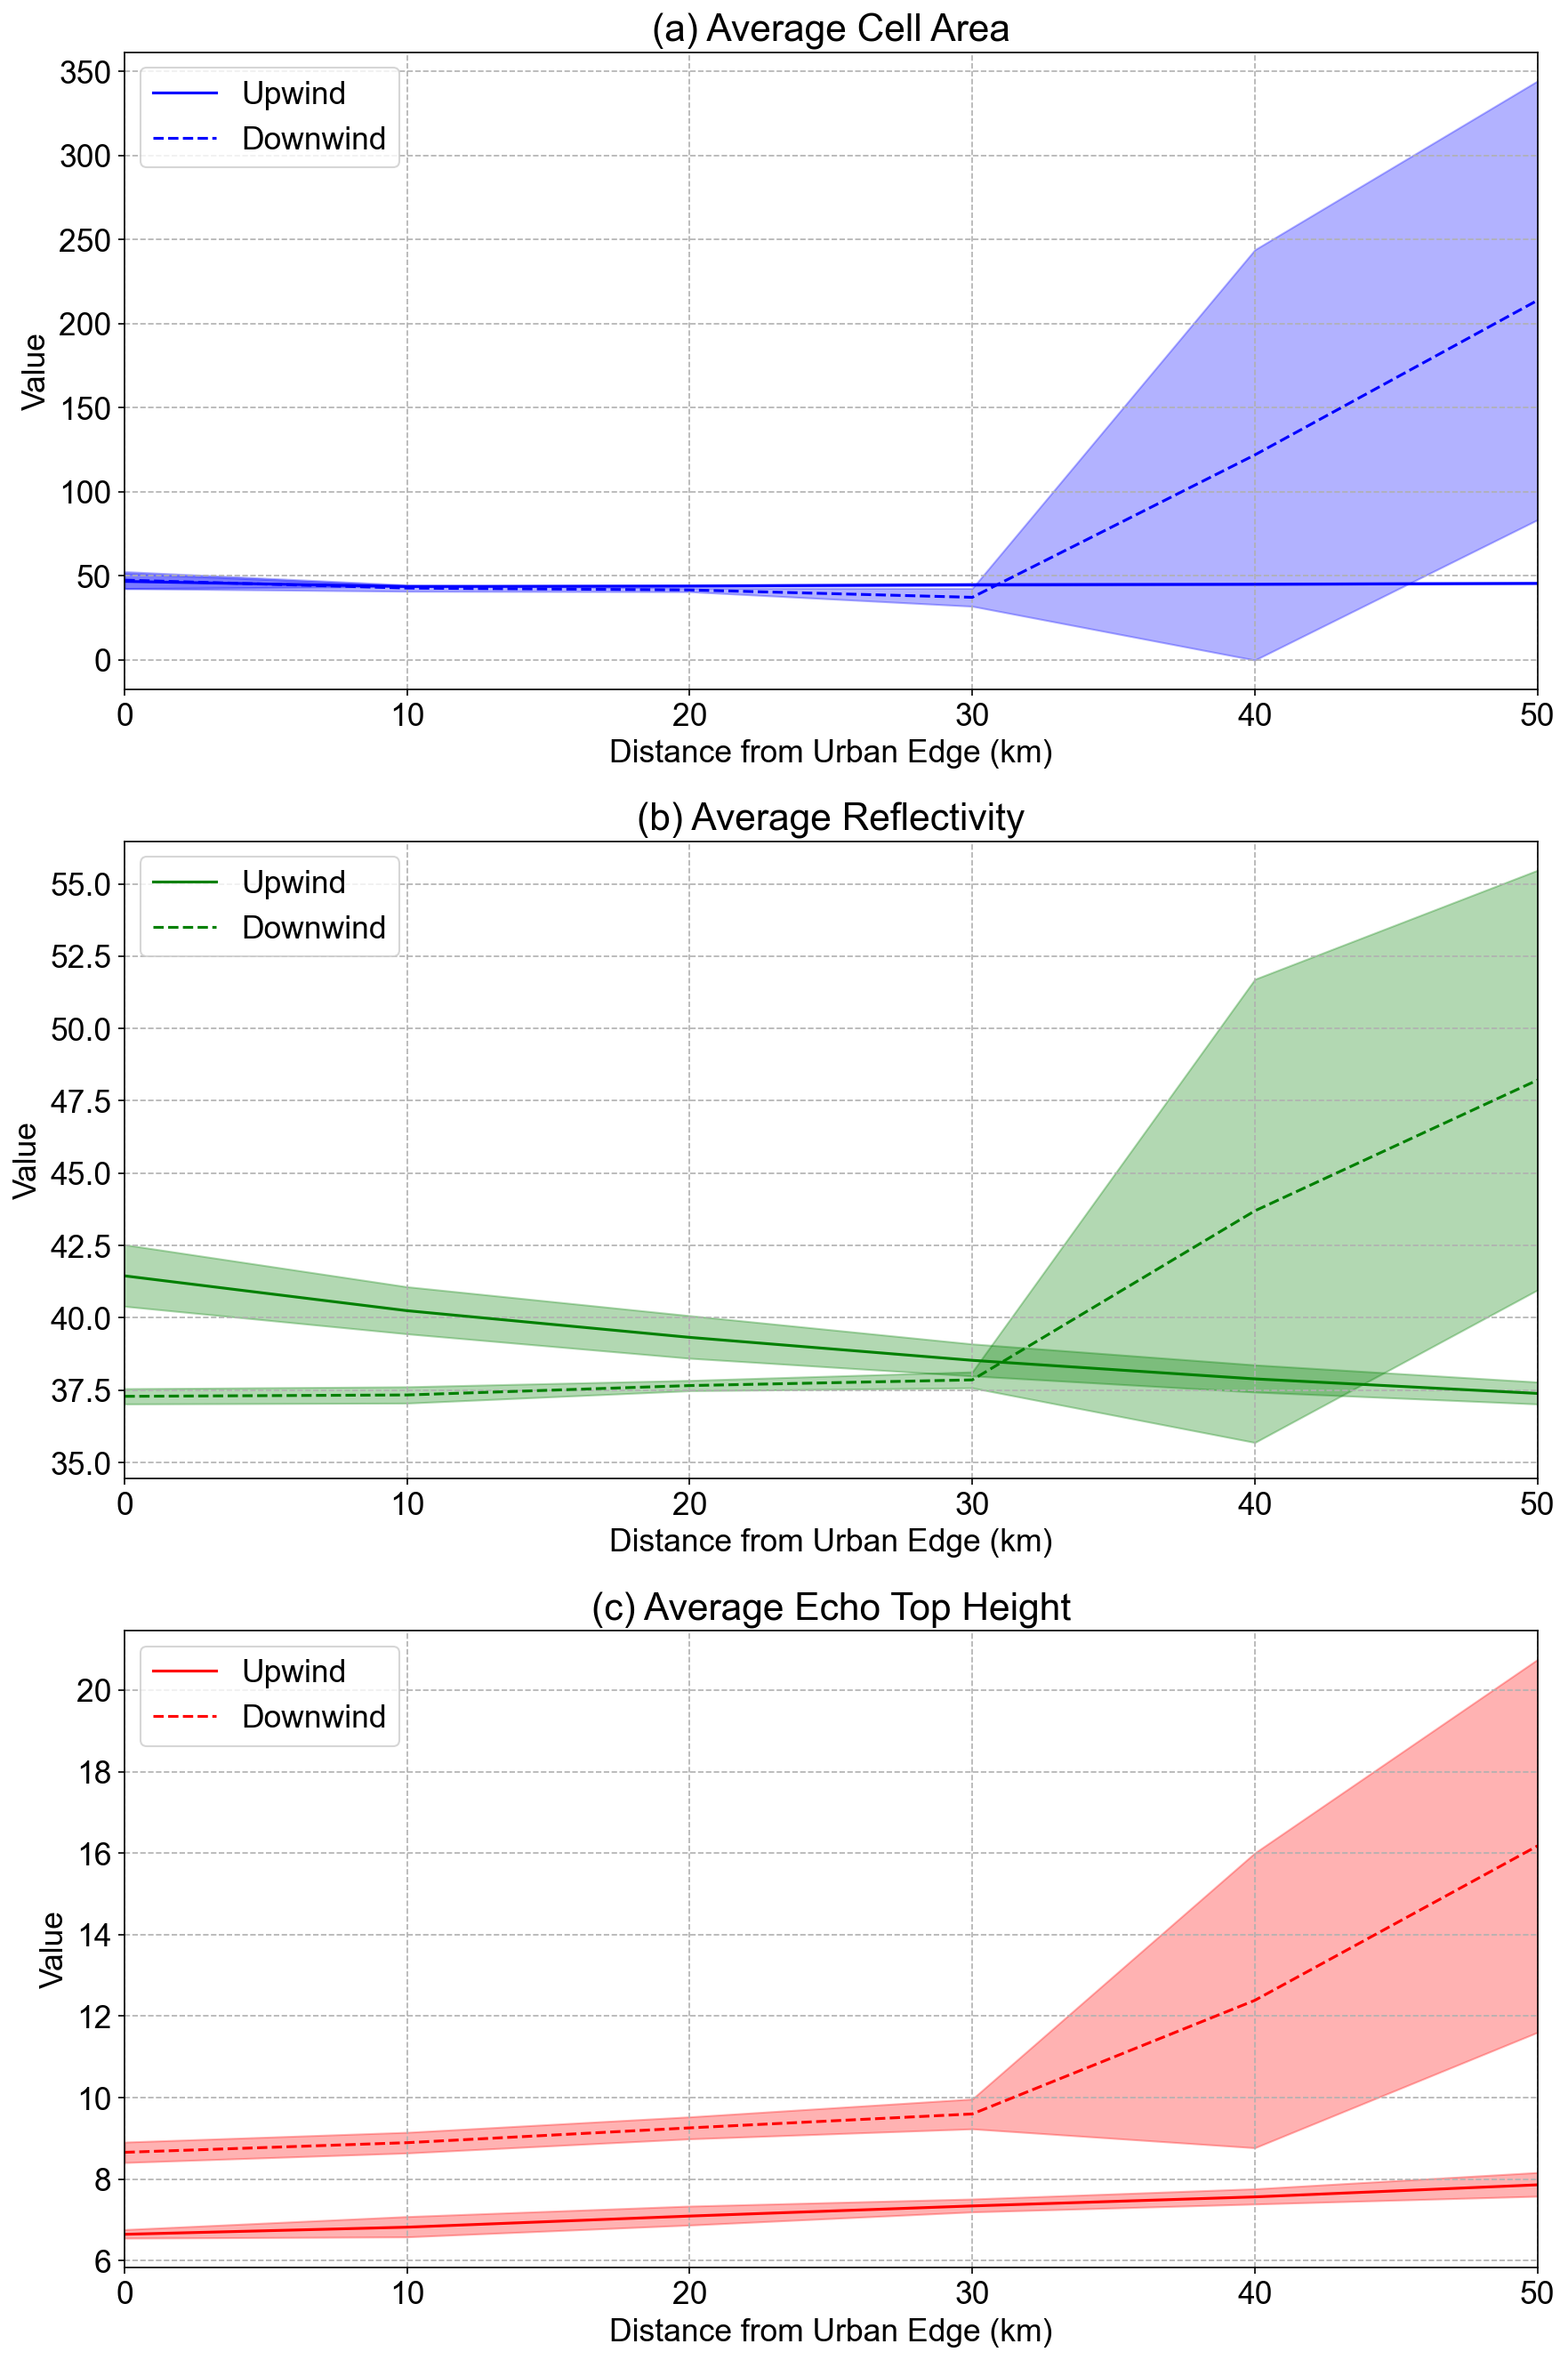

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic
import matplotlib as mpl

mpl.rcParams['font.size'] = 17
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.facecolor'] = 'white'

# Function to calculate distance from the edge of the urban circle
def distance_from_urban_edge(lat, lon, center, radius_deg):
    distance_to_center = geodesic(center, (lat, lon)).kilometers
    radius_km = geodesic(center, (center[0], center[1] + radius_deg)).kilometers
    return max(0, distance_to_center - radius_km)

# Function to process data and get average cell area for each distance bin
def process_data_area(data, urban_center, urban_radius_deg, bin_width, data_field):
    cell_mean_latitudes = data['cell_meanlat'].values
    cell_mean_longitudes = data['cell_meanlon'].values
    max_data_values = data[data_field].max(dim='times').values  # Max value per cell as a scalar

    distances_from_edge = []
    data_values = []
    for lat_arr, lon_arr, value in zip(cell_mean_latitudes, cell_mean_longitudes, max_data_values):
        if not np.all(np.isnan(lat_arr)) and not np.all(np.isnan(lon_arr)) and not np.isnan(value):
            valid_indices = ~np.isnan(lat_arr) & ~np.isnan(lon_arr)
            mean_lat = np.mean(lat_arr[valid_indices])
            mean_lon = np.mean(lon_arr[valid_indices])
            distance = distance_from_urban_edge(mean_lat, mean_lon, urban_center, urban_radius_deg)
            distances_from_edge.append(distance)
            data_values.append(value)

    max_distance_from_edge = max(distances_from_edge)
    bins_from_edge = np.arange(0, max_distance_from_edge + bin_width, bin_width)

    avg_value_per_bin = []
    for i in range(len(bins_from_edge)-1):
        bin_indices = (distances_from_edge >= bins_from_edge[i]) & (distances_from_edge < bins_from_edge[i+1])
        if np.any(bin_indices):
            avg_value = np.mean([value for j, value in enumerate(data_values) if bin_indices[j]])
        else:
            avg_value = 0
        avg_value_per_bin.append(avg_value)

    return bins_from_edge, avg_value_per_bin

# Function to calculate running mean and standard deviation
def calculate_running_stats(data, window_size):
    running_mean = np.convolve(data, np.ones(window_size) / window_size, mode='valid')
    running_std = []
    for i in range(len(data) - window_size + 1):
        running_std.append(np.std(data[i:i+window_size]))
    return running_mean, np.array(running_std)

# Provided urban area coordinates and radius in degrees
urban_longitude = -95.43207102398061
urban_latitude = 29.759806849922565
urban_radius_deg = 0.49588967877239437
urban_center = (urban_latitude, urban_longitude)

# Load the NetCDF data for different scenarios
data1 = stats_upwind  # Replace with actual file path or variable
data2 = stats_downwind  # Replace with actual file path or variable

# Process each dataset
bin_width = 10  # km
running_mean_window = 3  # Window size for running mean

# For each data field, process data and calculate running mean and standard deviation
data_fields = ['cell_area', 'max_dbz', 'maxETH_20dbz']  # List of data fields
data_results = []  # Store results for each data field

for field in data_fields:
    bins_edge1, avg_data1 = process_data_area(data1, urban_center, urban_radius_deg, bin_width, field)
    running_mean1, running_std1 = calculate_running_stats(avg_data1, running_mean_window)
    
    bins_edge2, avg_data2 = process_data_area(data2, urban_center, urban_radius_deg, bin_width, field)
    running_mean2, running_std2 = calculate_running_stats(avg_data2, running_mean_window)
    
    data_results.append((bins_edge1, running_mean1, running_std1, running_mean2, running_std2))

# Plotting in a 3x1 subplot layout
fig, axs = plt.subplots(3, 1, figsize=(12, 18), dpi=150)

plot_titles = ['(a) Average Cell Area', '(b) Average Reflectivity', '(c) Average Echo Top Height']
colors = ['blue', 'green', 'red']

for i, (bins_edge, running_mean1, running_std1, running_mean2, running_std2) in enumerate(data_results):
    # Upwind plot with standard deviation
    axs[i].plot(bins_edge[:len(running_mean1)], running_mean1, color=colors[i], label='Upwind')
    axs[i].fill_between(bins_edge[:len(running_mean1)], running_mean1 - running_std1, running_mean1 + running_std1, color=colors[i], alpha=0.3)

    # Downwind plot with standard deviation
    axs[i].plot(bins_edge[:len(running_mean2)], running_mean2, color=colors[i], linestyle='dashed', label='Downwind')
    axs[i].fill_between(bins_edge[:len(running_mean2)], running_mean2 - running_std2, running_mean2 + running_std2, color=colors[i], alpha=0.3)

    axs[i].set_xlabel('Distance from Urban Edge (km)')
    axs[i].set_ylabel('Value')
    axs[i].set_title(plot_titles[i])
    axs[i].legend(loc='upper left')
    axs[i].set_xlim([0, 50])
    axs[i].grid(ls='--')

plt.tight_layout()
plt.show()

